In [2]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_path="D:\AICTE internship\dataset\TRAIN"
test_path="D:\AICTE internship\dataset\TEST"

In [6]:
#Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
# Load and preprocess the training data
x_data, y_data = [], []  # Lists to store image data and labels

In [8]:
for category in glob(train_path+'/*'):
     for file in tqdm(glob(category+'/*')): 
        img = cv2.imread(file) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_data.append(img) 
        y_data.append(category.split('/')[-1])
        data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [02:24<00:00, 69.27it/s] 


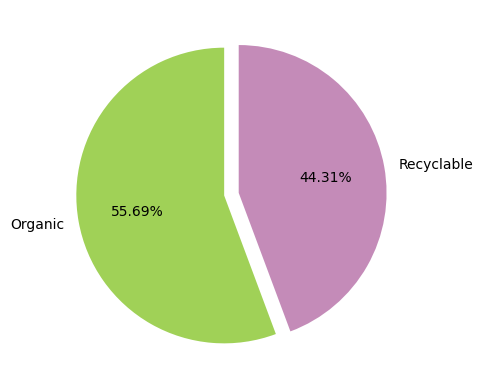

In [9]:
#Visualization
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'], autopct='%0.2f%%', colors=colors,startangle=90, explode=[0.05,0.05])
plt.show()

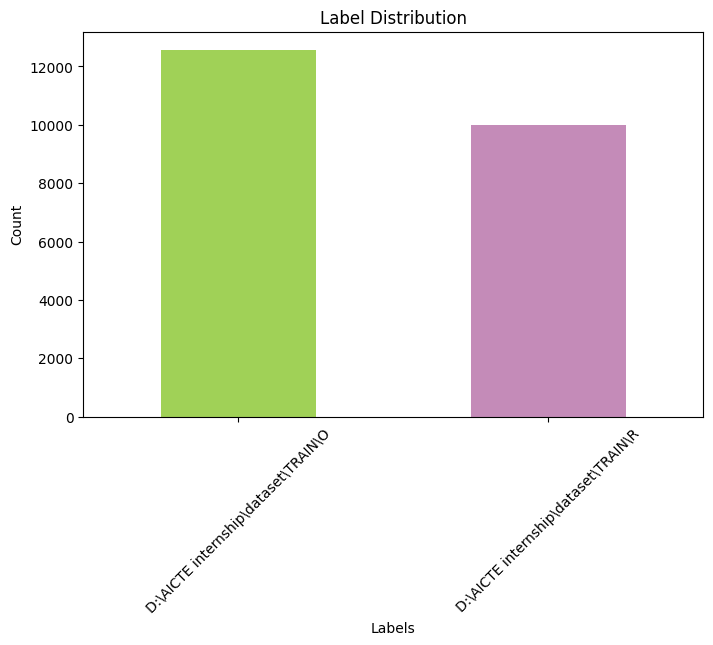

In [10]:
# Visualize the distribution of labels using a bar chart
plt.figure(figsize=(8, 5))  # Set figure size
data['label'].value_counts().plot(kind='bar', color=colors)
plt.title("Label Distribution")  # Add title
plt.xlabel("Labels")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

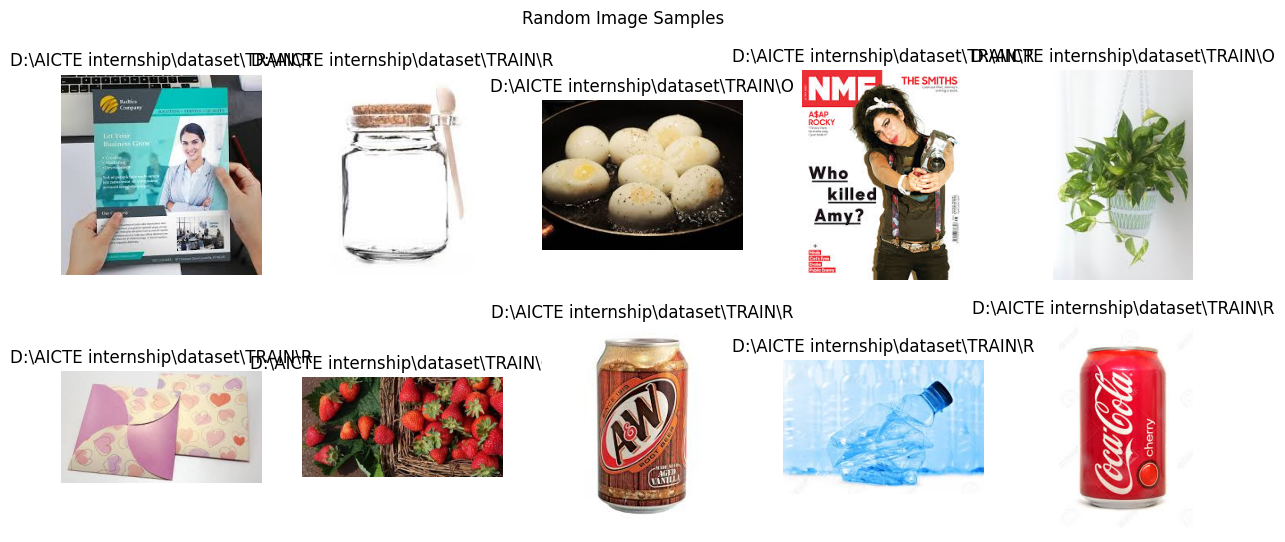

In [11]:
# Display a few random image samples from the dataset with their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    random_idx = np.random.randint(len(data))
    ax.imshow(data.iloc[random_idx].image)
    ax.set_title(data.iloc[random_idx].label)
    ax.axis('off')  # Remove axis for better visualization
plt.suptitle("Random Image Samples")  # Add a title for the entire figure
plt.show()

WEEK 2 TASK UPDATION:-


I used the MobileNetV2 architecture. The goal is to classify waste images into two categories efficiently and accurately. To achieve this, I leveraged transfer learning by using MobileNetV2, a pre-trained model on the ImageNet dataset, as the base model. This approach allows the model to benefit from pre-learned features, significantly reducing training time and computational resources. Custom layers, including a global average pooling layer, a dense layer with ReLU activation, and a dropout layer for regularization, were added on top of the base model to fine-tune it for the specific task of waste classification. The model was compiled using the Nadam optimizer and categorical cross-entropy loss, with accuracy as the evaluation metric.

In [30]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "Nadam",
              metrics = ["accuracy"])
batch_size = 32

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_7 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical",

)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical",

)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [29]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [19]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Use softmax for categorical classification
])

In [20]:
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),  # Reduced input size
    batch_size=32,  # Reduced batch size
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [22]:

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [23]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[ early_stopping]
)

Epoch 1/10
706/706 [==============================] - 506s 712ms/step - loss: 0.2656 - accuracy: 0.8953 - val_loss: 0.2579 - val_accuracy: 0.8985
Epoch 2/10
706/706 [==============================] - 213s 301ms/step - loss: 0.2078 - accuracy: 0.9178 - val_loss: 0.2557 - val_accuracy: 0.8993
Epoch 3/10
706/706 [==============================] - 206s 291ms/step - loss: 0.1926 - accuracy: 0.9257 - val_loss: 0.2655 - val_accuracy: 0.8926
Epoch 4/10
706/706 [==============================] - 207s 292ms/step - loss: 0.1838 - accuracy: 0.9281 - val_loss: 0.2141 - val_accuracy: 0.9200
Epoch 5/10
706/706 [==============================] - 209s 296ms/step - loss: 0.1729 - accuracy: 0.9336 - val_loss: 0.3528 - val_accuracy: 0.8552
Epoch 6/10
706/706 [==============================] - 211s 298ms/step - loss: 0.1698 - accuracy: 0.9340 - val_loss: 0.3877 - val_accuracy: 0.8257
Epoch 7/10
706/706 [==============================] - 206s 292ms/step - loss: 0.1665 - accuracy: 0.9349 - val_loss: 0.3269 -

In [28]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(train_generator)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(test_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

706/706 [==============================] - 408s 578ms/step - loss: 0.1170 - accuracy: 0.9557
Training Accuracy: 0.96
79/79 [==============================] - 18s 221ms/step - loss: 0.3608 - accuracy: 0.8623
Validation Accuracy: 0.86
